In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import gin
import numpy as np
import torch
import pytorch_lightning
from deepgen.models import GruLabeler, LstmLabeler
from deepgen.data import DatasetXY
from deepgen.utils import train_model, test_model
from tqdm import tqdm
import scipy 
import seaborn as sns

from matplotlib import pyplot as plt
from os.path import join

sns.set() # Setting seaborn as default style even if use only matplotlib
sns.set_context("paper")

In [95]:
gin.parse_config_file('configs/big_gru.gin')
gru_model_const = GruLabeler.load_from_checkpoint(checkpoint_path="../Output/May5_final_weights/GRU-const-2.ckpt").eval()
gru_model_ms = GruLabeler.load_from_checkpoint(checkpoint_path="../Output/May5_final_weights/GRU-ms-2.ckpt").eval()

In [146]:
def plot_heatmap(y_pred, y_true, length):
    sns.set(rc={'figure.figsize' : (11.7, 8.27),
           'axes.labelsize': 20,
           'axes.titlesize': 20, 
            'figure.dpi':100
           }
       )
    ax = sns.heatmap(y_pred.squeeze(0)[:length].T, cmap="viridis", yticklabels=5, xticklabels=1000)
    ax.plot(y_true[0][:length], c='red')
    _ = ax.set(xlabel='Genome wide', ylabel='Coalescent time')
    #ax.set_ylim([23, 0])
    plt.show()

In [4]:
def myexp(data):
    return scipy.special.softmax(data, axis=-1)

In [187]:
def plot_two_dist(path):
    y_pred = [0.0] * 32

    for i in range(100):
        data = myexp(torch.load(path + f"1_y_pred_{i}.pt"))
        y_pred += data.sum(dim=[0, 1]).detach().numpy()

    y_pred = y_pred / sum(y_pred)

    y_true = [0.0] * 32


    for i in range(100):
        Y = torch.load(path + f"y_true_{i}.pt")
        y_true += torch.bincount(Y.squeeze(0).long(), minlength=32).numpy()

    y_true = y_true / sum(y_true)

    w = 0.35
    plt.bar(np.arange(32)-w, y_pred, width=w, label='prediction',  align='center', edgecolor='none')
    plt.bar(np.arange(32), y_true, width=w, label='true',  align='center', edgecolor='none')

    plt.ylabel("Probability mass", fontsize=20)
    plt.xlabel("TMRCA", fontsize=18)
    plt.title("Comparison of predicted and true TMRCA distributions", fontsize=18)
    plt.legend(fontsize=20)
    plt.show()
    return y_pred, y_true

# CONST-2 

In [96]:
x.shape

torch.Size([1, 300000])

In [143]:
%%time
i = 1
path = "output_const_big_test/"

x = torch.load(path + "x_" + str(i) + ".pt")
y_pred = myexp(torch.load(path + "y_pred_" + str(i) + ".pt"))
y_true = torch.load(path + "y_true_" + str(i) + ".pt")

CPU times: user 74.8 ms, sys: 89.8 ms, total: 165 ms
Wall time: 547 ms


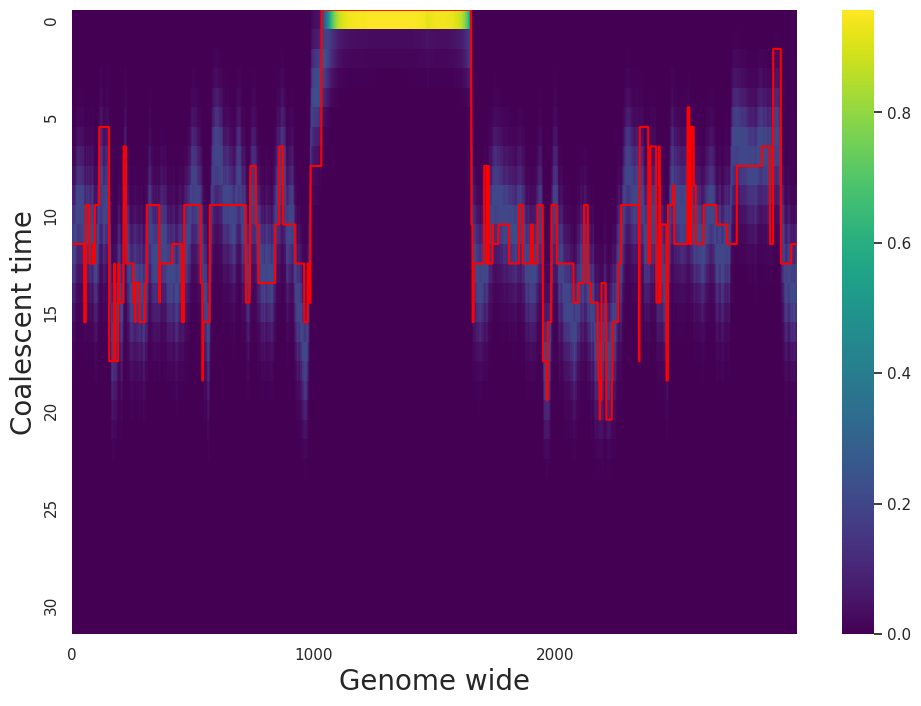

In [147]:
plot_heatmap(y_pred, y_true, 3000)

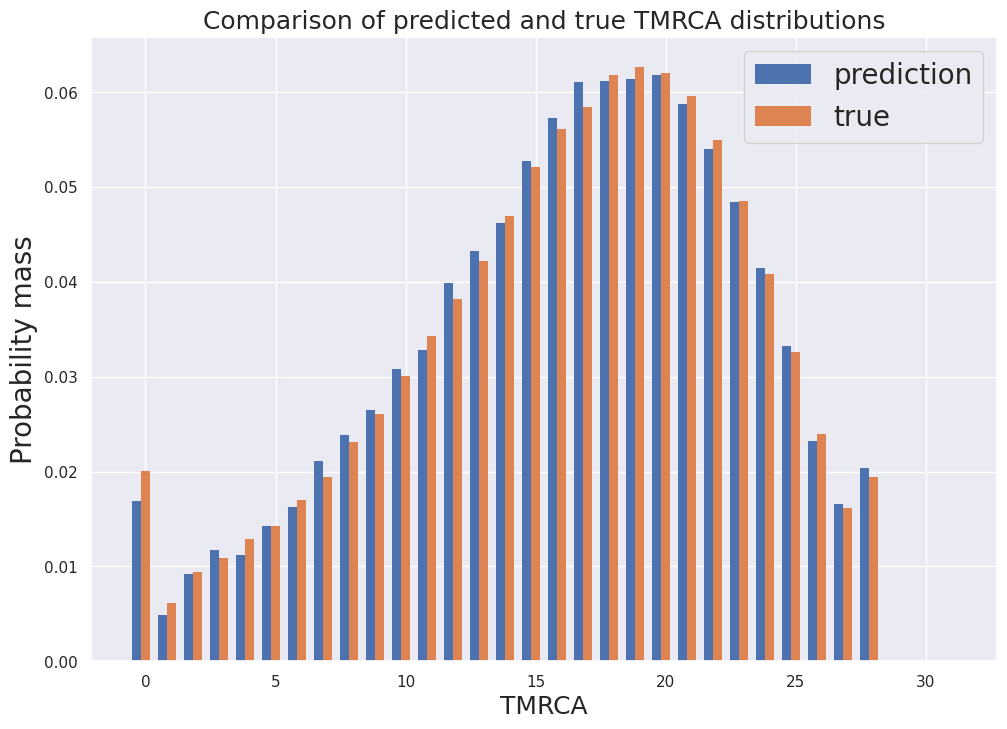

In [188]:
y_pred_1, y_true = plot_two_dist(path="o1/const/")

In [189]:
y_pred_2 = [0.0] * 32
path = "o1/const/"


for i in range(100):
    data = myexp(torch.load(path + f"2_y_pred_{i}.pt"))
    y_pred_2 += data.sum(dim=[0, 1]).detach().numpy()

y_pred_2 = y_pred_2 / sum(y_pred_2)

In [190]:
y_pred_2

array([1.15409858e-02, 4.13873491e-03, 4.33913385e-03, 4.30923385e-03,
       9.67067654e-03, 1.51942257e-02, 1.43452928e-02, 3.50789793e-02,
       3.35337569e-02, 3.98438122e-02, 3.94455284e-02, 4.50047780e-02,
       5.08615255e-02, 4.52786301e-02, 3.77549568e-02, 4.27814097e-02,
       4.85865918e-02, 5.29980753e-02, 5.65456449e-02, 5.79758852e-02,
       5.46952519e-02, 5.39176897e-02, 4.79752510e-02, 4.29494043e-02,
       3.70076635e-02, 2.91733386e-02, 2.30400936e-02, 1.75624337e-02,
       4.43990744e-02, 2.48798865e-05, 1.63666647e-05, 1.06950832e-05])

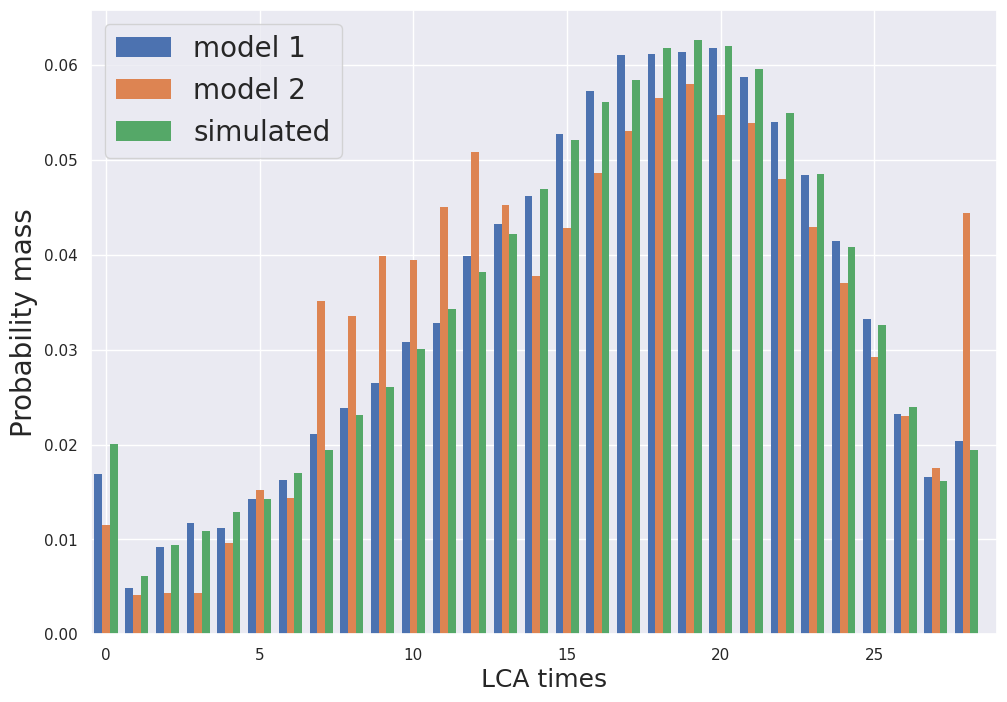

In [191]:
w = 0.3
ww=0.25
plt.bar(np.arange(32)-ww, y_pred_1, width=ww, label='model 1',  align='center', edgecolor='none')
plt.bar(np.arange(32), y_pred_2, width=ww, label='model 2',  align='center', edgecolor='none')
plt.bar(np.arange(32)+ww, y_true, width=ww, label='simulated',  align='center', edgecolor='none')

plt.ylabel("Probability mass", fontsize=20)
plt.xlabel("LCA times", fontsize=18)
plt.xlim([-0.5, 29])
plt.legend(fontsize=20)
plt.show()

In [192]:
y_pred_1

array([1.68552220e-02, 4.87301424e-03, 9.16356335e-03, 1.16882070e-02,
       1.12112336e-02, 1.42054146e-02, 1.62649687e-02, 2.10562836e-02,
       2.38882782e-02, 2.64851608e-02, 3.08361875e-02, 3.27841672e-02,
       3.98921628e-02, 4.32080185e-02, 4.62095838e-02, 5.27601750e-02,
       5.72299079e-02, 6.10266569e-02, 6.11651961e-02, 6.13372531e-02,
       6.17537433e-02, 5.87888589e-02, 5.40342250e-02, 4.84355615e-02,
       4.14786286e-02, 3.31776013e-02, 2.32427072e-02, 1.66101404e-02,
       2.03270631e-02, 4.40293138e-06, 2.64168350e-06, 3.77126286e-06])

In [193]:
y_true

array([0.0200337 , 0.00608937, 0.0094179 , 0.01088207, 0.0129325 ,
       0.01428997, 0.01697493, 0.01938237, 0.0230859 , 0.0260683 ,
       0.0301077 , 0.03430887, 0.03817103, 0.04219257, 0.04692773,
       0.0521384 , 0.05614737, 0.05838623, 0.06184537, 0.0626818 ,
       0.06204327, 0.05954847, 0.05493383, 0.0485054 , 0.04086783,
       0.03254977, 0.02393197, 0.0161248 , 0.0194306 , 0.        ,
       0.        , 0.        ])

# MS 2

In [198]:
i = 0
path = "o1/const/"

x = torch.load(path + "x_" + str(i) + ".pt")
y_pred_1 = myexp(torch.load(path + "1_y_pred_" + str(i) + ".pt"))
y_pred_1 = myexp(torch.load(path + "1_y_pred_" + str(i) + ".pt"))
y_true = torch.load(path + "y_true_" + str(i) + ".pt")

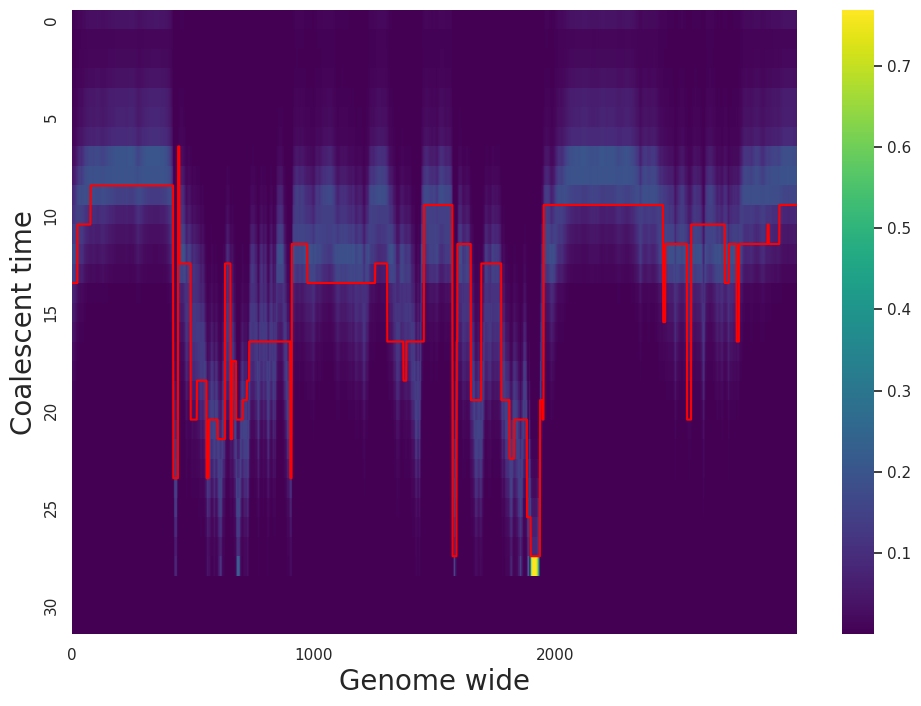

In [168]:
plot_heatmap(y_pred, y_true, 3000)

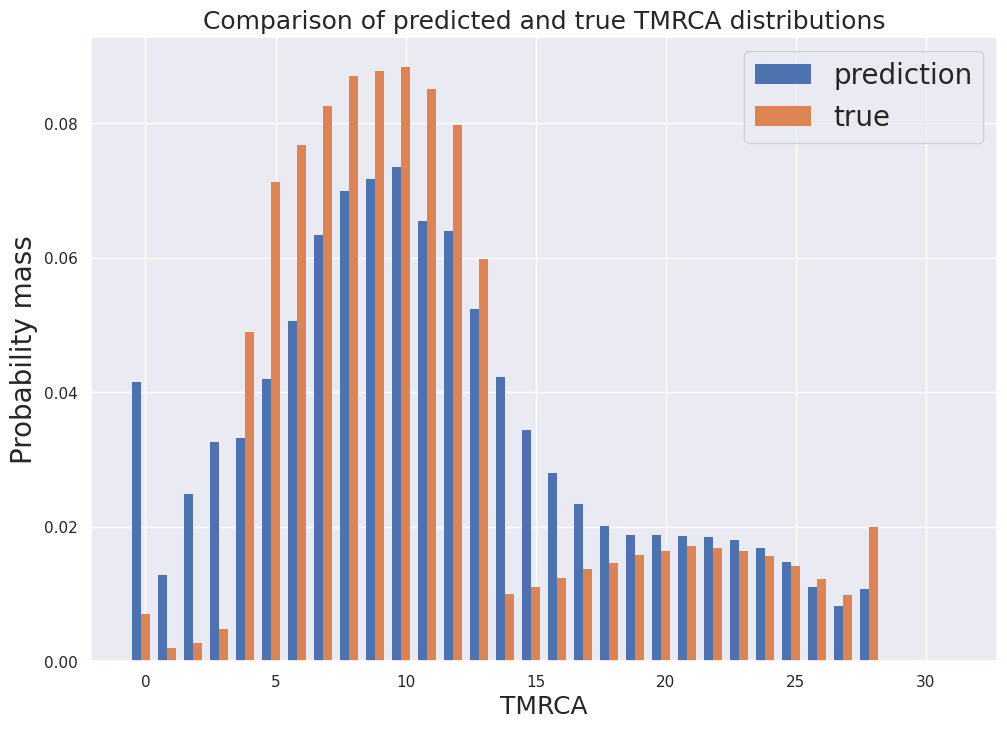

In [208]:
y_pred_1, y_true = plot_two_dist(path="../hugginface-genomics2/o2/")

In [209]:
y_pred_2 = [0.0] * 32
path = "../hugginface-genomics2/o2/"


for i in range(100):
    data = myexp(torch.load(path + f"2_y_pred_{i}.pt"))
    y_pred_2 += data.sum(dim=[0, 1]).detach().numpy()

y_pred_2 = y_pred_2 / sum(y_pred_2)

In [210]:
y_pred_2

array([3.38160008e-02, 1.31877585e-02, 1.33136666e-02, 1.33560229e-02,
       3.00392709e-02, 4.81989790e-02, 4.64316908e-02, 1.11339221e-01,
       9.78008672e-02, 9.89052365e-02, 7.85356317e-02, 6.79009398e-02,
       5.78756757e-02, 3.89366135e-02, 2.38723725e-02, 2.14797325e-02,
       1.96569230e-02, 1.83086030e-02, 1.75372243e-02, 1.70480080e-02,
       1.59095574e-02, 1.62402014e-02, 1.53054649e-02, 1.46618710e-02,
       1.36288704e-02, 1.17743893e-02, 1.01653394e-02, 8.49295362e-03,
       2.62465938e-02, 1.52415141e-05, 1.13757622e-05, 7.70342033e-06])

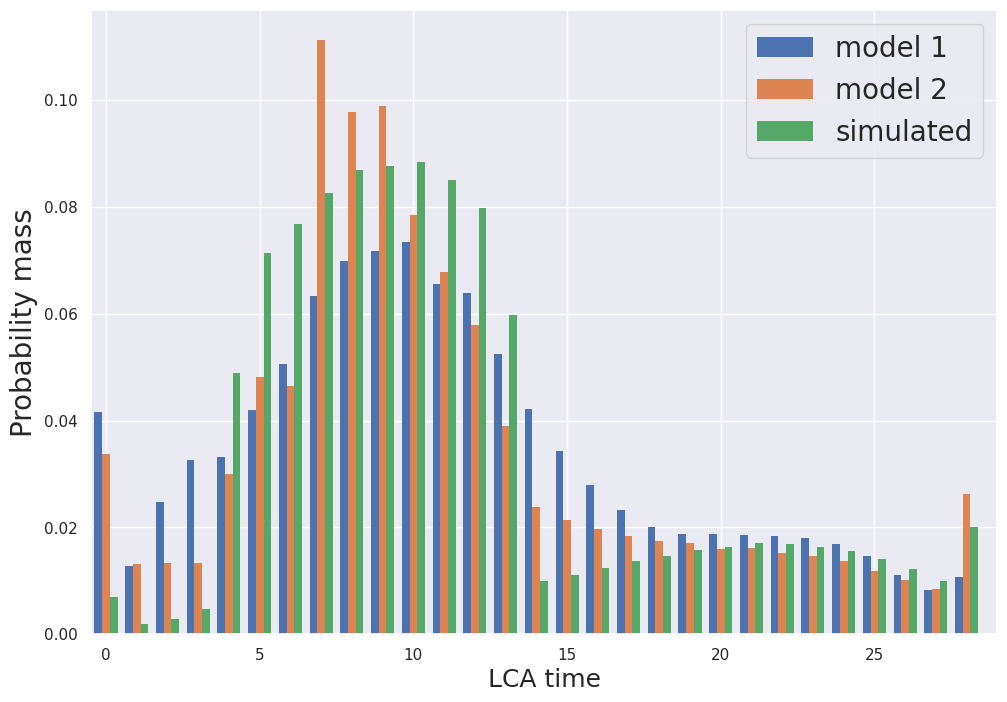

In [211]:
w = 0.25
plt.bar(np.arange(32)-w, y_pred_1, width=w, label='model 1',  align='center', edgecolor='none')
plt.bar(np.arange(32), y_pred_2, width=w, label='model 2',  align='center', edgecolor='none')
plt.bar(np.arange(32)+w, y_true, width=w, label='simulated',  align='center', edgecolor='none')

plt.ylabel("Probability mass", fontsize=20)
plt.xlabel("LCA time", fontsize=18)
plt.xlim([-0.5, 29])
plt.legend(fontsize=20)
plt.show()

In [212]:
y_pred_1

array([4.15553514e-02, 1.28054092e-02, 2.48157509e-02, 3.25625112e-02,
       3.31778507e-02, 4.20364696e-02, 5.05440020e-02, 6.33140268e-02,
       6.99368438e-02, 7.16785473e-02, 7.34567353e-02, 6.55255142e-02,
       6.39643815e-02, 5.24311566e-02, 4.22639493e-02, 3.43551386e-02,
       2.79633588e-02, 2.33491211e-02, 2.00560628e-02, 1.88366957e-02,
       1.87984695e-02, 1.86167150e-02, 1.84004527e-02, 1.80099964e-02,
       1.68411699e-02, 1.47145825e-02, 1.10337050e-02, 8.26344908e-03,
       1.06804314e-02, 5.05049649e-06, 3.09480584e-06, 4.00633326e-06])

In [213]:
y_true

array([0.00696103, 0.0019125 , 0.00276743, 0.00472793, 0.04887997,
       0.07131953, 0.07677407, 0.08259883, 0.0870099 , 0.08768463,
       0.08841017, 0.0851093 , 0.0797604 , 0.05981913, 0.0100335 ,
       0.0110244 , 0.01241067, 0.01373973, 0.01466763, 0.01580447,
       0.01632   , 0.01714747, 0.0168981 , 0.01642017, 0.0155957 ,
       0.01412987, 0.01219363, 0.0098876 , 0.01999223, 0.        ,
       0.        , 0.        ])

# Const

In [48]:
i = 1
path = "../Output/May5_final_weights/const/"

x = torch.load(path + "x_" + str(i) + ".pt")
y_pred = myexp(torch.load(path + "y_pred_" + str(i) + ".pt"))
y_true = torch.load(path + "y_true_" + str(i) + ".pt")

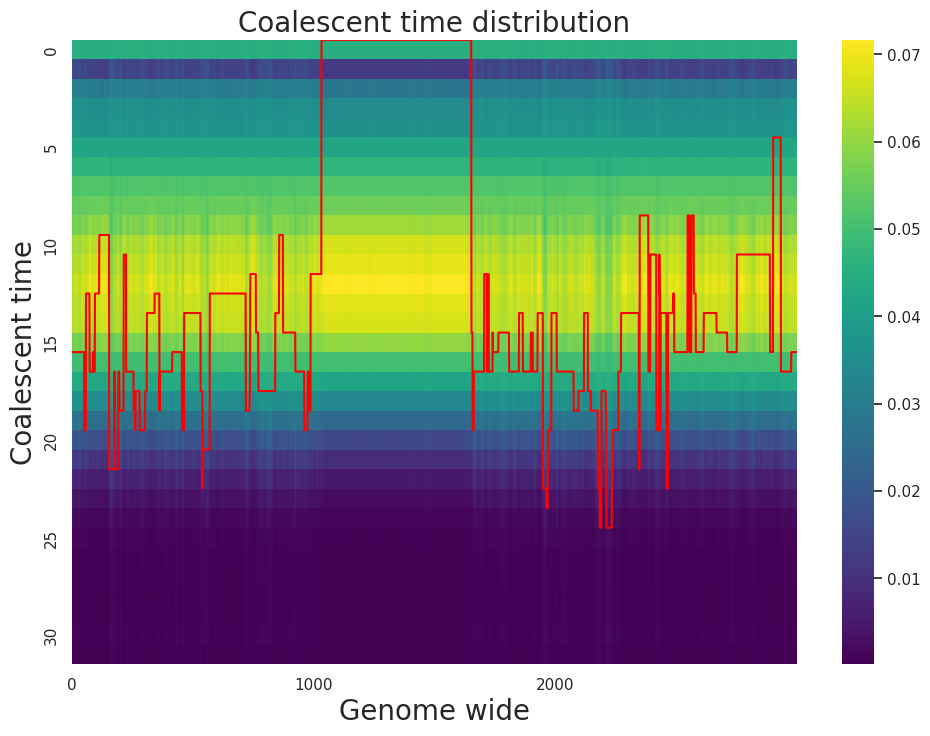

In [49]:
plot_heatmap(y_pred, y_true, 3000)

In [50]:
1+2

3

(array([0.04520113, 0.01441677, 0.0297541 , 0.03533421, 0.03681041,
        0.04231514, 0.04639618, 0.05194664, 0.05507893, 0.05862388,
        0.06368014, 0.06554492, 0.06761685, 0.06587362, 0.06508849,
        0.05786704, 0.04982043, 0.0431215 , 0.03485398, 0.02627124,
        0.01796587, 0.01117319, 0.0065875 , 0.00346016, 0.00157973,
        0.00083682, 0.00051771, 0.00050854, 0.00040604, 0.00043093,
        0.00059274, 0.0003252 ]),
 array([0.04843885, 0.01336388, 0.01861479, 0.02159776, 0.02598176,
        0.02862455, 0.03411776, 0.03774861, 0.04199339, 0.04582176,
        0.05053867, 0.05578982, 0.059004  , 0.0616263 , 0.06395764,
        0.06397418, 0.06257127, 0.05791424, 0.05263709, 0.045434  ,
        0.03691042, 0.02795364, 0.01962006, 0.01254255, 0.00717042,
        0.00372091, 0.00156545, 0.00076624, 0.        , 0.        ,
        0.        , 0.        ]))

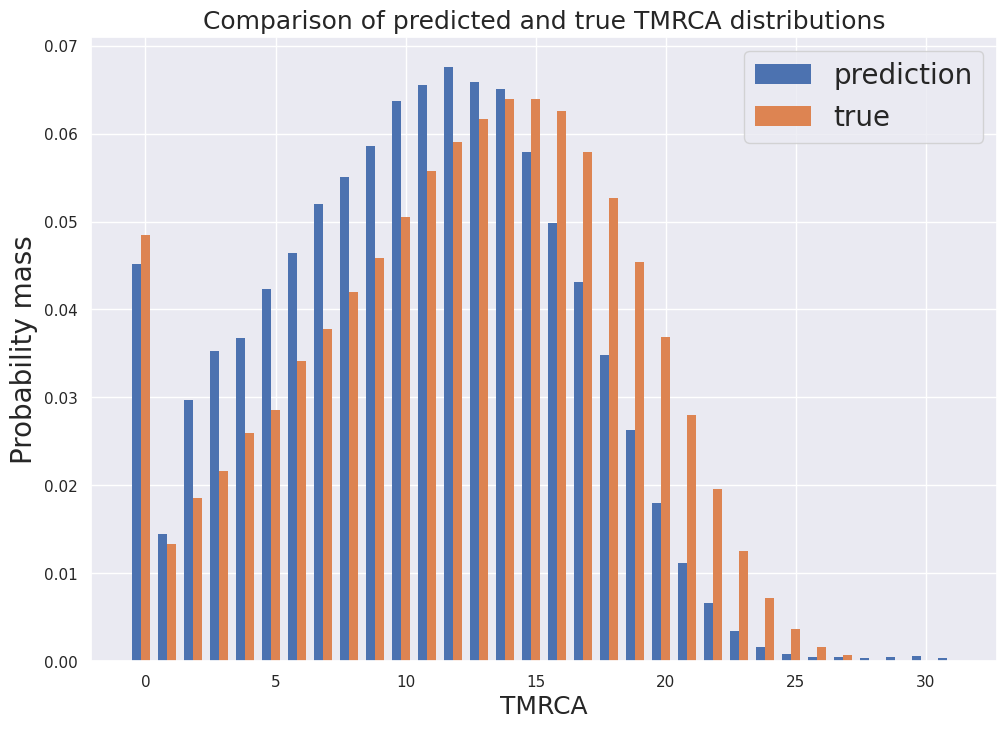

In [51]:
plot_two_dist(path="../Output/May5_final_weights/const/")

# MS

In [31]:
i = 1
path = "../Output/May5_final_weights/ms/"

x = torch.load(path + "x_" + str(i) + ".pt")
y_pred = myexp(torch.load(path + "y_pred_" + str(i) + ".pt"))
y_true = torch.load(path + "y_true_" + str(i) + ".pt")

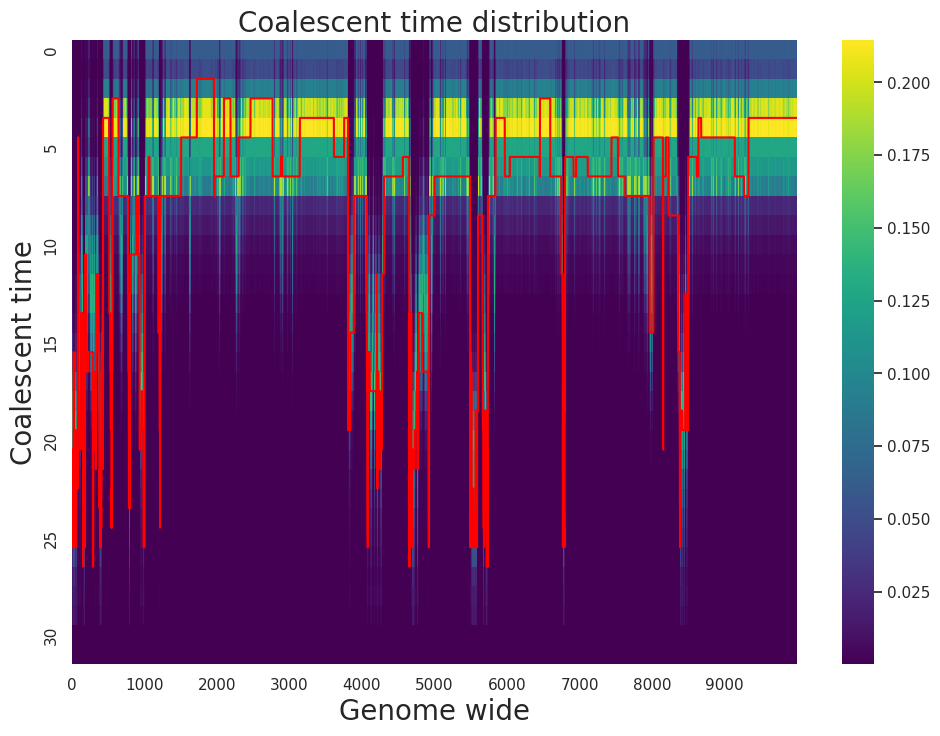

In [33]:
plot_heatmap(y_pred, y_true, 10000)

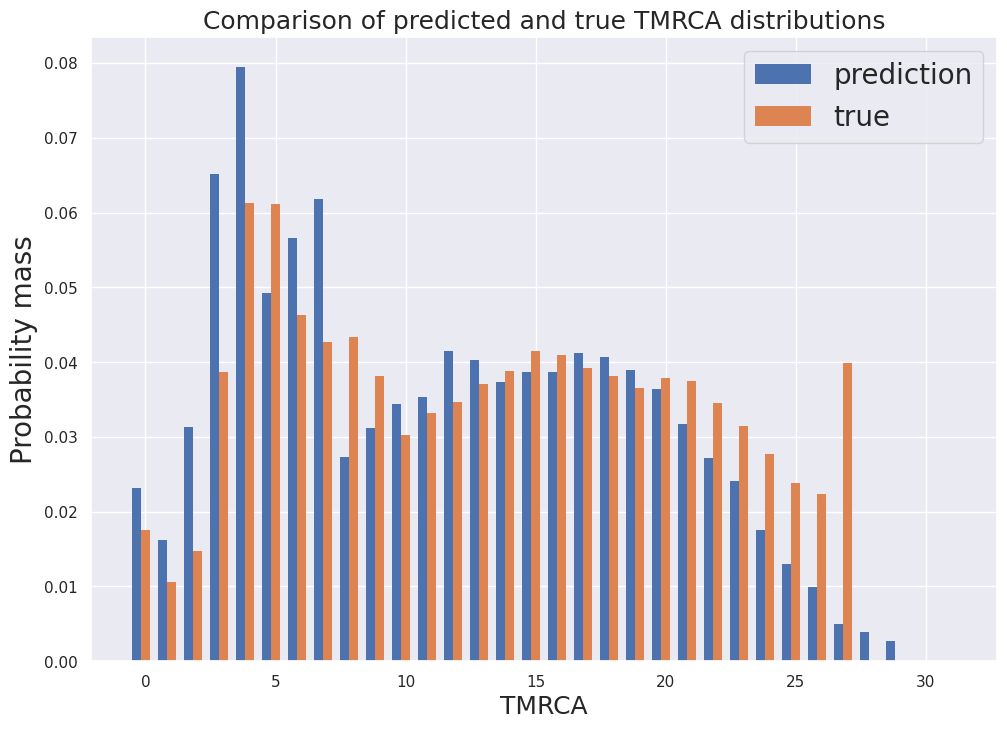

In [34]:
plot_two_dist(path="../Output/May5_final_weights/ms/")

In [84]:
gin.parse_config_file('configs/lstm.gin')
lstm_model = LstmLabeler.load_from_checkpoint(checkpoint_path="lstm_const/lstm-4-layers.ckpt").eval()
dataset = iter(DatasetXY().test_dataloader())

In [85]:
x, y_true = next(dataset)

In [86]:
with torch.no_grad():
    y_pred = myexp(lstm_model(x))

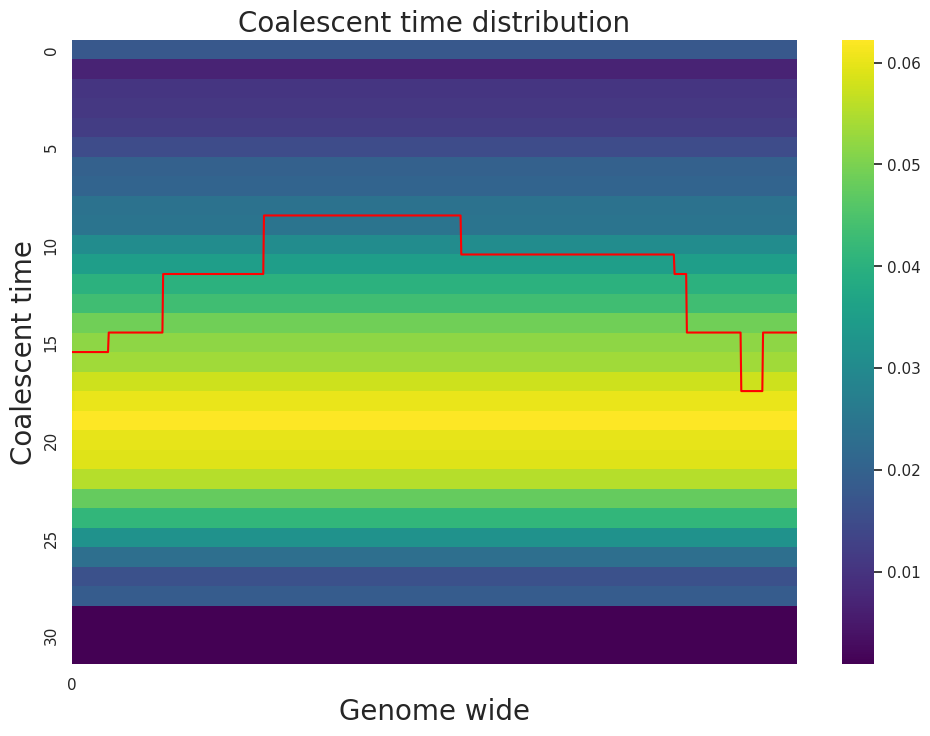

In [87]:
plot_heatmap(y_pred, y_true, 1000)

In [242]:
gin.parse_config_file('configs/big_lstm.gin')
lstm_model = LstmLabeler.load_from_checkpoint(checkpoint_path="lstm_const/lstm-4x-layers.ckpt").eval()
dataset = iter(DatasetXY().test_dataloader())

In [224]:
%%time
x, y = next(dataset)

CPU times: user 38.2 s, sys: 2.05 s, total: 40.3 s
Wall time: 40.2 s


In [225]:
x.shape

torch.Size([1, 300000])

In [243]:
%%time

with torch.no_grad():
    out = lstm_model(x)

CPU times: user 2min 57s, sys: 8.19 s, total: 3min 5s
Wall time: 1min 31s


In [244]:
y_pred = myexp(out).squeeze(0).numpy()

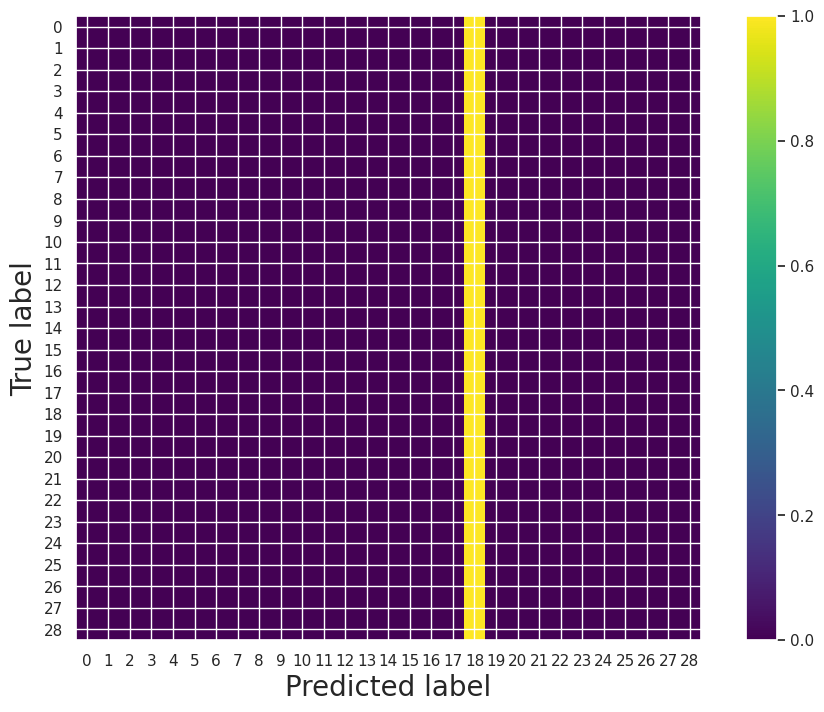

In [245]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y.squeeze(0).long(),
                                        np.argmax(y_pred, axis=1).astype(np.long),
                                        include_values=False, 
                                       normalize='true')